# Question 1

#### *Is there an increase in crime during major shopping holidays?*

In [23]:
# Dependencies and setup
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy import stats

## Data Cleansing

Crime report data from 2016 for three US cities, Austin, Los Angeles, and Chicago was selected to run the study. Cleansing was done in a previous step. This grouped the data by a common list of crime types and counted the number of each crime type reported each day.

In this step, a list of major shopping holiday dates is used to divide the data. A standardized timestamp column is also added.

In [24]:
# Read in the data
cities_2016_df = pd.read_csv('cities_by_date_2016.csv')
cities_2016_df.dropna(inplace=True, axis=1)

# Add a column which tells us if it's a holiday
holidays_df = pd.read_csv('retail_holidays.csv')
def check_if_holiday(d):
    result = False
    for h in holidays_df['2016 Year']:
        if d == h: result = True
    
    return result

cities_2016_df['Is_Holiday'] = cities_2016_df['Date'].apply(check_if_holiday)
cities_2016_df['Is_Holiday_int'] = cities_2016_df['Date'].apply(lambda h: int(check_if_holiday(h)))

# Add a timestamp column
cities_2016_df['timestamp'] = cities_2016_df['Date'].apply(lambda ts: datetime.datetime.strptime(ts, '%m/%d/%Y'))

column_names = list(cities_2016_df)
cities = ['Austin', 'Chicago', 'LA']

# Add a total crime column for each city
for c in cities:
    total_column_name = 'Total_Crimes_' + c
    cities_2016_df[total_column_name] = 0
    for col in column_names:
        if c in col:
            cities_2016_df[total_column_name] = cities_2016_df[total_column_name] + cities_2016_df[col]

# Separate into two data frames. Also, drop the last row.
cities_2016_holidays_df = cities_2016_df[(cities_2016_df.Is_Holiday_int > 0)]
cities_2016_non_holidays_df = cities_2016_df[(cities_2016_df.Is_Holiday_int < 1) &
                                            (cities_2016_df.Total_Crimes_LA < 200000)]

## Statistical Tests

A student's T test was run comparing the number of crimes committed per day on holidays vs. non-holidays for the three US cities. This showed no statistically significant difference in crime for Austin and Los Angeles. P-scores were 56.7% and 37.1% respectively.

Chicago was found to have a small (4.43%) *decrease* in crime on holidays on average, with a P-score of 3.84%.

In [25]:
aust_hol = cities_2016_holidays_df['Total_Crimes_Austin']
aust_non = cities_2016_non_holidays_df['Total_Crimes_Austin']

t2, p2 = stats.ttest_ind(aust_hol, aust_non)
print("T Austin = " + str(t2))
print("T Austin = " + str(p2))

LA_hol = cities_2016_holidays_df['Total_Crimes_LA']
LA_non = cities_2016_non_holidays_df['Total_Crimes_LA']

t2, p2 = stats.ttest_ind(LA_hol, LA_non)
print("T LA = " + str(t2))
print("P LA = " + str(p2))

chi_hol = cities_2016_holidays_df['Total_Crimes_Chicago']
chi_non = cities_2016_non_holidays_df['Total_Crimes_Chicago']

t_chi, p_chi = stats.ttest_ind(chi_hol, chi_non)
print(f"T Chicago: {t_chi}")
print(f"P Chicago: {p_chi}")

avg_diff_chi = stats.tmean(chi_hol) - stats.tmean(chi_non)
pct_diff_chi = 100 * avg_diff_chi * 2 / (stats.tmean(chi_hol) + stats.tmean(chi_non))

print(f"Chicago average crime difference: {avg_diff_chi}")
print(f"Chicago average crime % difference: {pct_diff_chi} %")

T Austin = -0.5736545463690724
T Austin = 0.5665558530152603
T LA = 0.8958879334012444
P LA = 0.3709046912766367
T Chicago: -2.078106931167499
P Chicago: 0.038399807996862274
Chicago average crime difference: -23.788866980130365
Chicago average crime % difference: -4.430393334410504 %


## Visualizations

The histograms below show the divided data distributions for all three cities. The difference between holiday and non-holiday crime counts can be seen on the Chicago figure. Since there are so few holidays, their histograms are difficult to discern. Plotting these again on a log scale helps to visualize the smaller data distributions.

The time series figure below provides another way to visualize Chicago crime in 2016. Data is quite noisy. There also appears to be a seasonal effect on crime, with an increase in the summer.

<IPython.core.display.Javascript object>


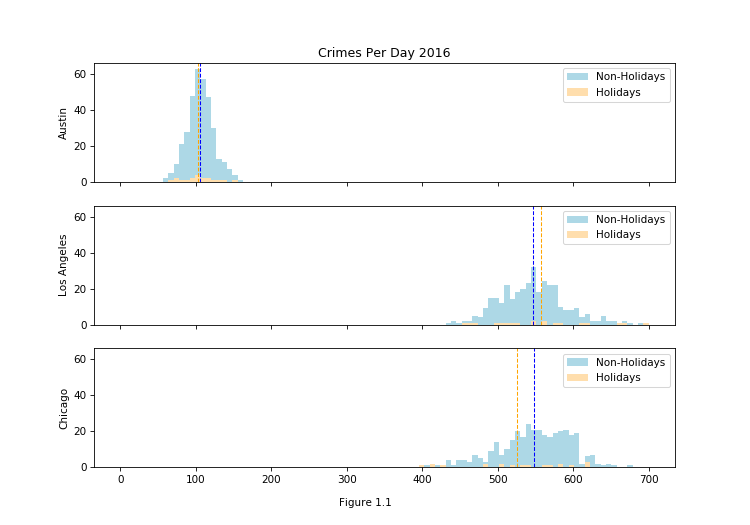

In [26]:
fig, ax= plt.subplots(3, figsize=(10, 7), sharex=True, sharey=True)


bins = np.linspace(0, 700, 100)
plt.yscale('linear')


ax[0].hist(cities_2016_non_holidays_df['Total_Crimes_Austin'], bins, label='Non-Holidays', color='lightblue')
ax[0].hist(cities_2016_holidays_df['Total_Crimes_Austin'], bins, label='Holidays', color='navajowhite')

ax[0].axvline(cities_2016_non_holidays_df['Total_Crimes_Austin'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[0].axvline(cities_2016_holidays_df['Total_Crimes_Austin'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[0].legend()
ax[0].set_ylabel('Austin')

ax[1].hist(cities_2016_non_holidays_df['Total_Crimes_LA'], bins, label='Non-Holidays', color='lightblue')
ax[1].hist(cities_2016_holidays_df['Total_Crimes_LA'], bins, label='Holidays', color='navajowhite')

ax[1].axvline(cities_2016_non_holidays_df['Total_Crimes_LA'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[1].axvline(cities_2016_holidays_df['Total_Crimes_LA'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[1].legend()
ax[1].set_ylabel('Los Angeles')


ax[2].hist(cities_2016_non_holidays_df['Total_Crimes_Chicago'], bins, label='Non-Holidays', color='lightblue')
ax[2].hist(cities_2016_holidays_df['Total_Crimes_Chicago'], bins, label='Holidays', color='navajowhite')

ax[2].axvline(cities_2016_non_holidays_df['Total_Crimes_Chicago'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[2].axvline(cities_2016_holidays_df['Total_Crimes_Chicago'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[2].legend()
ax[2].set_ylabel('Chicago')

ax[0].set_title('Crimes Per Day 2016')

plt.show()
plt.text(325,-20,'Figure 1.1', horizontalalignment='center', verticalalignment='center')

fig.savefig('./Images/histograms_crime_2016.png')

<IPython.core.display.Javascript object>


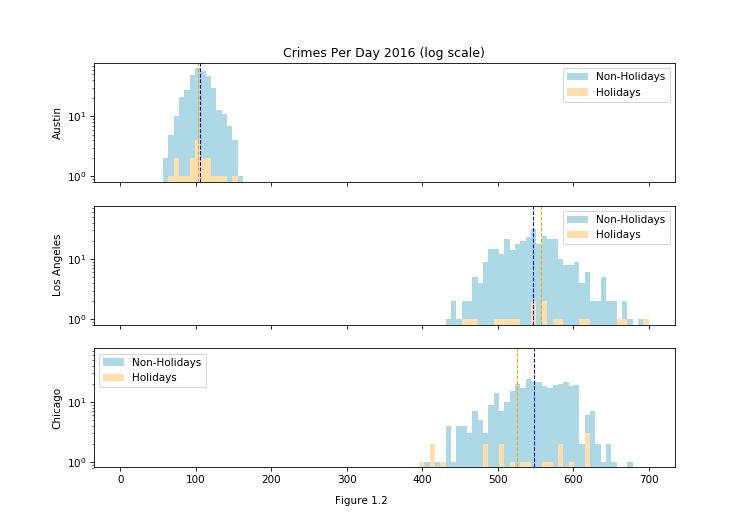

In [27]:
fig, ax= plt.subplots(3, figsize=(10, 7), sharex=True, sharey=True)

bins = np.linspace(0, 700, 100)
plt.yscale('log')


ax[0].hist(cities_2016_non_holidays_df['Total_Crimes_Austin'], bins, label='Non-Holidays', color='lightblue')
ax[0].hist(cities_2016_holidays_df['Total_Crimes_Austin'], bins, label='Holidays', color='navajowhite')

ax[0].axvline(cities_2016_non_holidays_df['Total_Crimes_Austin'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[0].axvline(cities_2016_holidays_df['Total_Crimes_Austin'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[0].legend()
ax[0].set_ylabel('Austin')

ax[1].hist(cities_2016_non_holidays_df['Total_Crimes_LA'], bins, label='Non-Holidays', color='lightblue')
ax[1].hist(cities_2016_holidays_df['Total_Crimes_LA'], bins, label='Holidays', color='navajowhite')

ax[1].axvline(cities_2016_non_holidays_df['Total_Crimes_LA'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[1].axvline(cities_2016_holidays_df['Total_Crimes_LA'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[1].legend()
ax[1].set_ylabel('Los Angeles')


ax[2].hist(cities_2016_non_holidays_df['Total_Crimes_Chicago'], bins, label='Non-Holidays', color='lightblue')
ax[2].hist(cities_2016_holidays_df['Total_Crimes_Chicago'], bins, label='Holidays', color='navajowhite')

ax[2].axvline(cities_2016_non_holidays_df['Total_Crimes_Chicago'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[2].axvline(cities_2016_holidays_df['Total_Crimes_Chicago'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[2].legend()
ax[2].set_ylabel('Chicago')

ax[0].set_title('Crimes Per Day 2016 (log scale)')

plt.show()
plt.text(0.46,-0.28,'Figure 1.2', horizontalalignment='center', verticalalignment='center', clip_on=False, transform=ax[2].transAxes)

fig.savefig('./Images/histograms_crime_2016_log_scale.png')

<IPython.core.display.Javascript object>


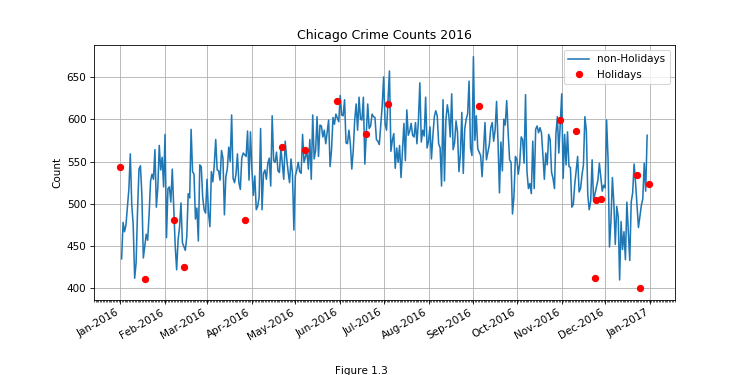

In [28]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

months = mdates.MonthLocator()
days = mdates.DayLocator()


ax.plot(cities_2016_non_holidays_df['timestamp'],
        cities_2016_non_holidays_df['Total_Crimes_Chicago'], label="non-Holidays")

ax.plot(cities_2016_holidays_df['timestamp'],
        cities_2016_holidays_df['Total_Crimes_Chicago'], 'o', c='r', label="Holidays")

date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.legend()
ax.grid()

plt.ylabel('Count')
plt.title('Chicago Crime Counts 2016')

fig.autofmt_xdate()

plt.show()

plt.text(0.46,-0.28,'Figure 1.3', horizontalalignment='center', verticalalignment='center', clip_on=False, transform=ax.transAxes)

fig.savefig('./Images/time_series_chicago_crime_2016.png')